## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
absentdf = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [0]:
absent = absentdf.copy()
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not usefu to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [0]:
absent = absent.drop(['ID', 'Weight', 'Height'], axis=1)

In [0]:
for label, content in absent.items():
    #print('label:', label)
    print(absent[label].describe())

count    740.000000
mean      19.216216
std        8.433406
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64
count    740.000000
mean       6.324324
std        3.436287
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Month of absence, dtype: float64
count    740.000000
mean       3.914865
std        1.421675
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Day of the week, dtype: float64
count    740.000000
mean       2.544595
std        1.111831
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Seasons, dtype: float64
count    740.000000
mean     221.329730
std       66.952223
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: Transportation expense, dtype: float64
count  

In [0]:
absent['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

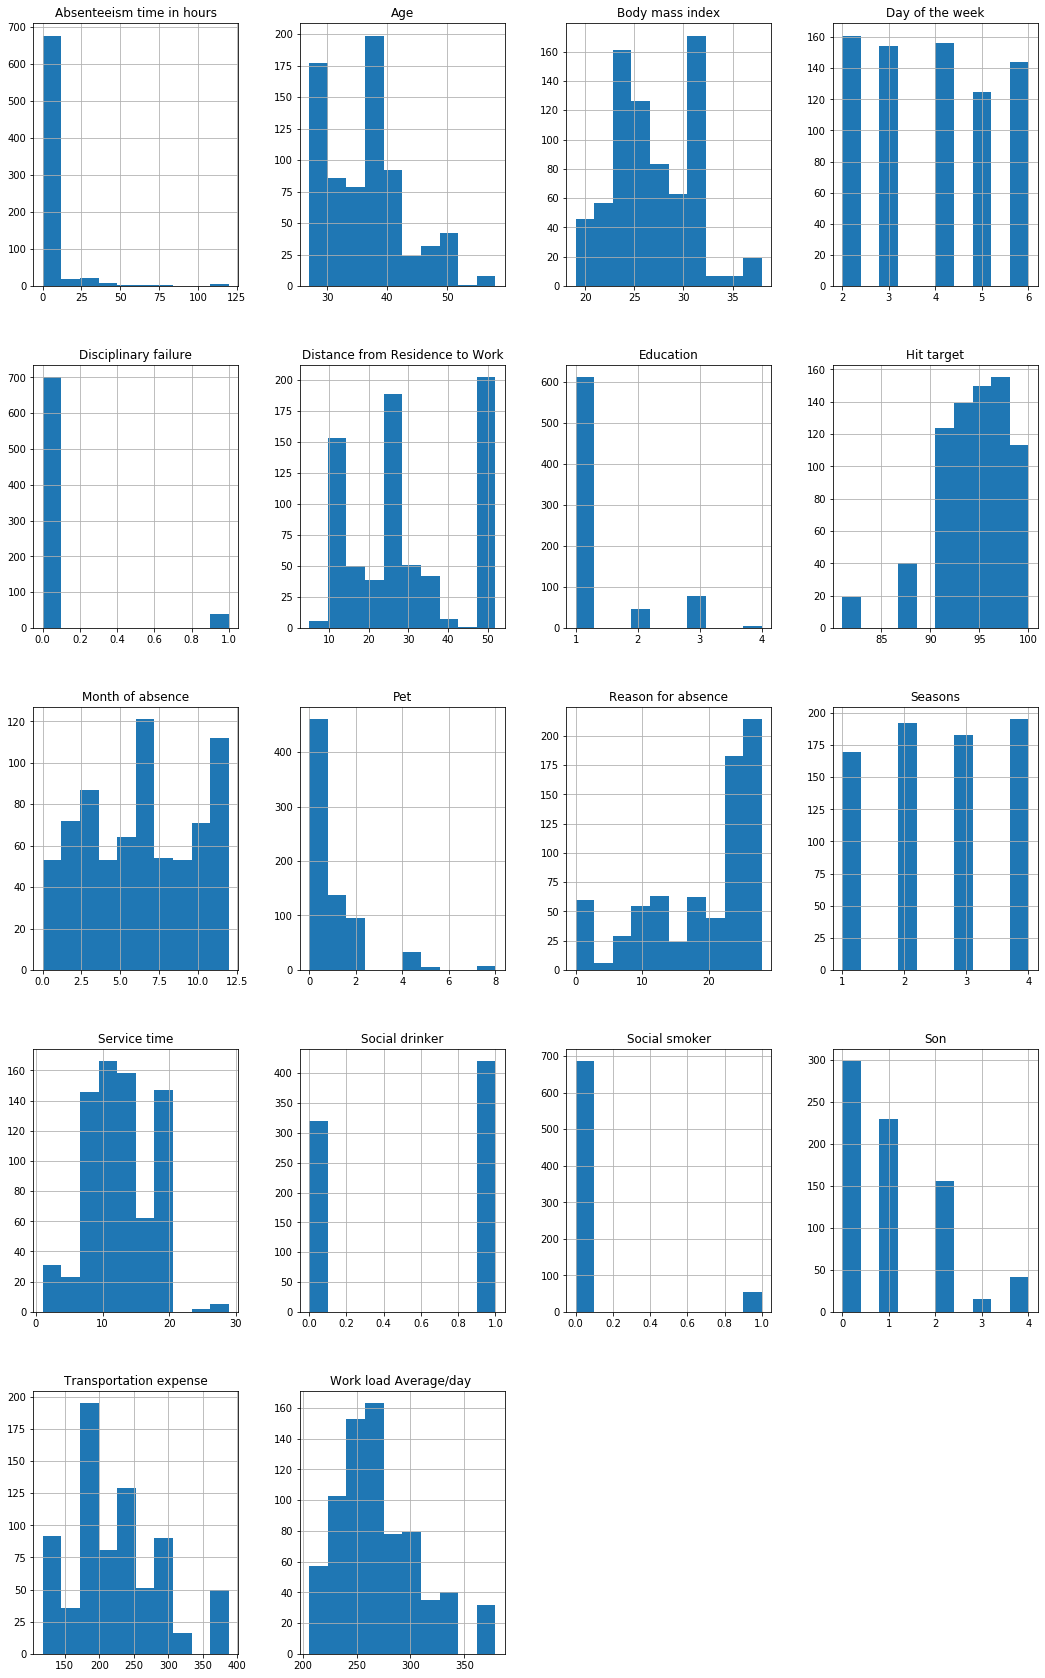

In [0]:
hist = absent.hist(figsize=(18,30))

In [0]:
absent['Social drinker'] = absent['Social drinker'].astype('object')
absent['Social smoker'] = absent['Social smoker'].astype('object')
absent['Disciplinary failure'] = absent['Disciplinary failure'].astype('object')
absent['Education'] = absent['Education'].astype('object')
absent['Seasons'] = absent['Seasons'].astype('object')
absent['Day of the week'] = absent['Day of the week'].astype('object')
absent['Month of absence'] = absent['Month of absence'].astype('object')
absent['Reason for absence'] = absent['Reason for absence'].astype('object')

absent = pd.concat([absent,pd.get_dummies(absent['Seasons'], prefix="sea", drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Day of the week'], prefix="dow", drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Month of absence'], prefix="moa", drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Reason for absence'], prefix="rfa", drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Education'], prefix="edu", drop_first=True)], axis=1)


dummy_column_names = list(pd.get_dummies(absent['Seasons'], prefix="sea", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(absent['Day of the week'], prefix="dow", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(absent['Month of absence'], prefix="moa", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(absent['Reason for absence'], prefix="rfa", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(absent['Education'], prefix="edu", drop_first=True).columns)


absent.head()


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,sea_2,sea_3,sea_4,dow_3,dow_4,dow_5,dow_6,moa_1,moa_2,moa_3,moa_4,moa_5,moa_6,moa_7,moa_8,moa_9,moa_10,moa_11,moa_12,rfa_1,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_21,rfa_22,rfa_23,rfa_24,rfa_25,rfa_26,rfa_27,rfa_28,edu_2,edu_3,edu_4
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
absent = absent.drop(['Seasons', 'Day of the week', 'Month of absence', 'Reason for absence', 'Education'], axis=1)

In [0]:
absent.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,sea_2,sea_3,sea_4,dow_3,dow_4,dow_5,dow_6,moa_1,moa_2,moa_3,moa_4,moa_5,moa_6,moa_7,moa_8,moa_9,moa_10,moa_11,moa_12,rfa_1,rfa_2,rfa_3,rfa_4,rfa_5,rfa_6,rfa_7,rfa_8,rfa_9,rfa_10,rfa_11,rfa_12,rfa_13,rfa_14,rfa_15,rfa_16,rfa_17,rfa_18,rfa_19,rfa_21,rfa_22,rfa_23,rfa_24,rfa_25,rfa_26,rfa_27,rfa_28,edu_2,edu_3,edu_4
0,289,36,13,33,239.554,97,0,2,1,0,1,30,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,31,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,279,5,14,39,239.554,97,0,2,1,1,0,24,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,289,36,13,33,239.554,97,0,2,1,0,1,30,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 62 columns):
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null object
Son                                740 non-null int64
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet                                740 non-null int64
Body mass index                    740 non-null int64
Absenteeism time in hours          740 non-null int64
sea_2                              740 non-null uint8
sea_3                              740 non-null uint8
sea_4                              740 non-null uint8
dow_3                     

Scale the indepdendent variables using the standard scaler

In [0]:
# answer below:

from sklearn.preprocessing import StandardScaler

y = absent['Absenteeism time in hours']

X = absent.drop('Absenteeism time in hours', axis=1)

X = StandardScaler().fit_transform(X)

In [0]:
print(X)

[[ 1.01140838  0.42955567  0.10176977 ... -0.25745373 -0.3457107
  -0.07372098]
 [-1.54437915 -1.12169354  1.24282479 ... -0.25745373 -0.3457107
  -0.07372098]
 [-0.63266547  1.44123994  1.24282479 ... -0.25745373 -0.3457107
  -0.07372098]
 ...
 [-1.54437915 -1.05424792  0.10176977 ... -0.25745373 -0.3457107
  -0.07372098]
 [ 0.14453308  0.36211005  0.32998078 ... -0.25745373 -0.3457107
  -0.07372098]
 [-0.63266547  1.03656623  0.32998078 ... -0.25745373 -0.3457107
  -0.07372098]]


In [0]:
print(y)

0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64


Split the data into train and test (test proportion=0.2).

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [0]:
# answer below:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear', C=1, epsilon=0.01)
svr_linear.fit(X_train, y_train)



SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
print(svr_linear.score(X_train, y_train))
print(svr_linear.score(X_test, y_test))

0.10399533701150587
0.15252058423994674


If you are unhappy with your model's performance, perform a grid search to optimize C.

In [0]:
# answer below:

from sklearn.model_selection import GridSearchCV

svr = SVR(kernel='linear', epsilon=0.01)

tuned_parameters = [{'C': [.000001 ,.00001, .0001, .001, .01, .1, .5, 1, 5, 10]}]
svr = GridSearchCV(svr,  param_grid=tuned_parameters, cv=10)
svr.fit(X_train, y_train)
print(svr.best_params_)



{'C': 0.01}


In [0]:

svr_linear = SVR(kernel='linear', C=0.01, epsilon=0.01)
svr_linear.fit(X_train, y_train)


SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
print(svr_linear.score(X_train, y_train))
print(svr_linear.score(X_test, y_test))

0.06454676145687577
0.08994987415386546


In [0]:
epsvr = SVR(kernel='linear', C=0.01)

tuned_parameters = [{'epsilon': [.000001 ,.00001, .0001, .001, .01, .1, .5, 1, 5, 10, 100, 1000]}]
epsvr = GridSearchCV(epsvr,  param_grid=tuned_parameters, cv=10)
epsvr.fit(X_train, y_train)
print(epsvr.best_params_)


{'epsilon': 0.5}


In [0]:
svr_linear = SVR(kernel='linear', C=10, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
print(svr_linear.score(X_train, y_train))
print(svr_linear.score(X_test, y_test))

0.10536370139076257
0.1547111020093881


In [0]:
svr_linear = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
print(svr_linear.score(X_train, y_train))
print(svr_linear.score(X_test, y_test))

0.21254868544570116
0.11424011556368298


In [0]:
svr_linear = SVR(kernel='poly', C=10, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
print(svr_linear.score(X_train, y_train))
print(svr_linear.score(X_test, y_test))

0.3135360461039305
0.09221931312545717
